In [1]:
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/jessicali9530/celeba-dataset?resource=download")

Skipping, found downloaded files in ".\celeba-dataset" (use force=True to force download)


In [3]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,SeparableConv2D,MaxPooling2D,Lambda
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Conv2D,add, concatenate
from tensorflow.keras.layers import LeakyReLU, Activation, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [4]:
import pandas as pd


attributes = pd.read_csv(r'C:\Users\TotalTech\Downloads\archive\list_attr_celeba.csv')
partition = pd.read_csv(r'C:\Users\TotalTech\Downloads\archive\list_eval_partition.csv')
landmarks = pd.read_csv(r'C:\Users\TotalTech\Downloads\archive\list_landmarks_align_celeba.csv')

image_directory = r'C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba'





In [5]:
%matplotlib inline


In [6]:
import os


image_dir = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"

files = os.listdir(image_dir)
print(files) 


['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

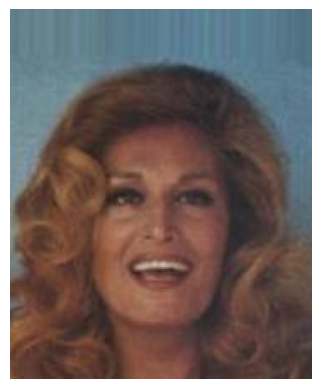

In [7]:
import cv2
import matplotlib.pyplot as plt


image_path = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba\017828.jpg"


image = cv2.imread(image_path)


if image is None:
    print("Image not loaded. Check the file path or file format.")
else:
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
   
    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.show()


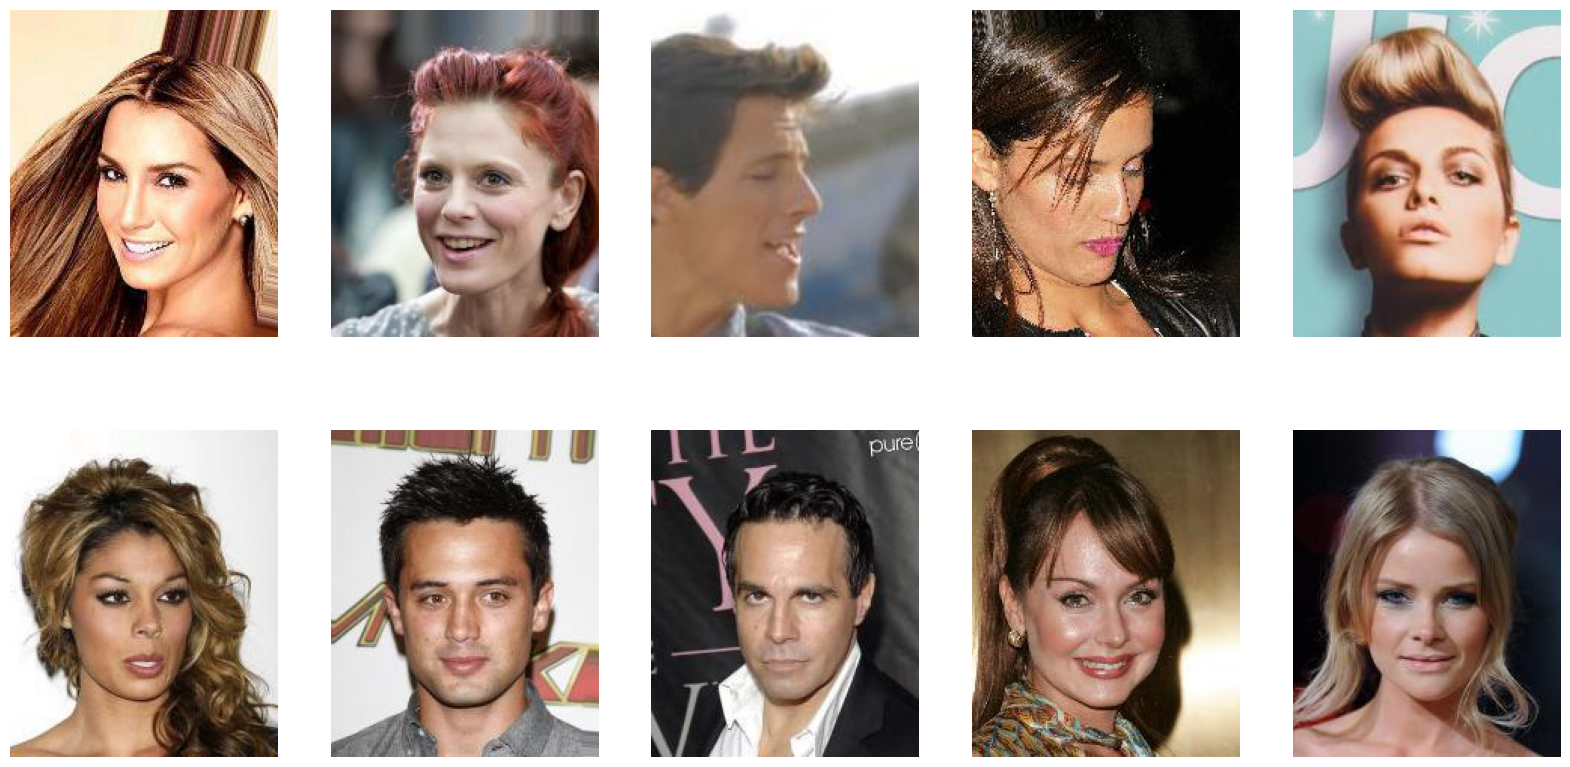

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


image_dir = 'C:\\Users\\TotalTech\\Downloads\\archive\\img_align_celeba\\img_align_celeba'


image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]


images_to_display = image_files[:10]  

plt.figure(figsize=(20, 10))
for i, img_file in enumerate(images_to_display):
    img_path = os.path.join(image_dir, img_file)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)  
    plt.imshow(img)
    plt.axis('off') 
plt.show()



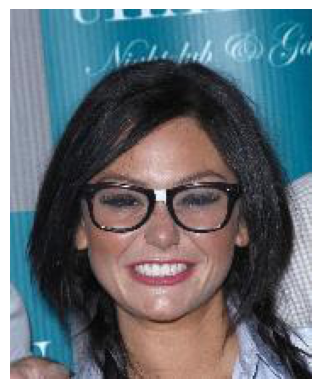

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba\011382.jpg"  # Use one of the methods above
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') 
plt.show()


In [10]:
landmarks_df = pd.read_csv(r'C:\Users\TotalTech\Downloads\archive\list_landmarks_align_celeba.csv')
landmarks_df.head()

image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  000001.jpg         69        109         106         113      77     142   
1  000002.jpg         69        110         107         112      81     135   
2  000003.jpg         76        112         104         106     108     128   
3  000004.jpg         72        113         108         108     101     138   
4  000005.jpg         66        114         112         112      86     119   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           73          152           108           154  
1           70          151           108           153  
2           74          156            98           158  
3           71          155           101           151  
4           71          147           104           150

In [11]:
import sys
print(sys.executable)

C:\Users\TotalTech\miniconda3\python.exe


In [12]:
type(landmarks)


pandas.core.frame.DataFrame

In [13]:
import pandas as pd
landmarks = pd.DataFrame(landmarks)


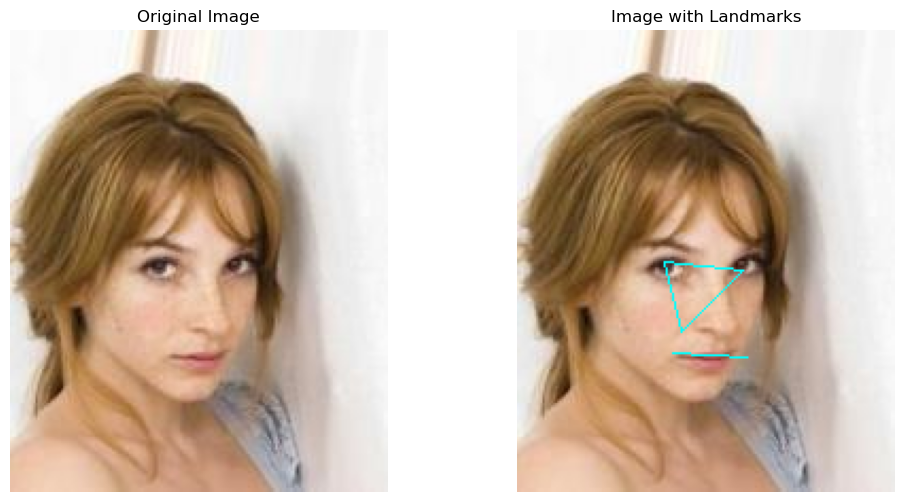

In [14]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

landmarks = pd.read_csv(r'C:\Users\TotalTech\Downloads\archive\list_landmarks_align_celeba.csv')
landmarks_numeric = landmarks.drop(columns=['image_id'])
eyes_x, eyes_y, eyes_w, eyes_h = landmarks_numeric.iloc[0, 0:4]
nose_x, nose_y = landmarks_numeric.iloc[0, 4:6]
leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = landmarks_numeric.iloc[0, 6:10]

left_eye = (int(eyes_x), int(eyes_y))
right_eye = (int(eyes_w), int(eyes_h))
nose = (int(nose_x), int(nose_y))
left_mouth = (int(leftmouth_x), int(leftmouth_y))
right_mouth = (int(rightmouth_x), int(rightmouth_y))

image_path = r'C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba\202531.jpg'
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
landmark_image = original_image_rgb.copy()

landmark_image = cv2.line(landmark_image, left_eye, right_eye, (0, 255, 255), 1)
landmark_image = cv2.line(landmark_image, left_eye, nose, (0, 255, 255), 1)
landmark_image = cv2.line(landmark_image, right_eye, nose, (0, 255, 255), 1)
landmark_image = cv2.line(landmark_image, left_mouth, right_mouth, (0, 255, 255), 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(landmark_image)
plt.title("Image with Landmarks")
plt.axis('off')

plt.show()






In [15]:
bboxes_df = pd.read_csv('C:/Users/TotalTech/Downloads/archive/list_bbox_celeba.csv')

bboxes_df.head()

image_id  x_1  y_1  width  height
0  000001.jpg   95   71    226     313
1  000002.jpg   72   94    221     306
2  000003.jpg  216   59     91     126
3  000004.jpg  622  257    564     781
4  000005.jpg  236  109    120     166

In [16]:
import pandas as pd

# Load bounding boxes data
bboxes_df = pd.read_csv('C:\\Users\\TotalTech\\Downloads\\archive\\list_bbox_celeba.csv')  # Update path if necessary

# Inspect the columns of the DataFrame
print(bboxes_df.columns)


Index(['image_id', 'x_1', 'y_1', 'width', 'height'], dtype='object')


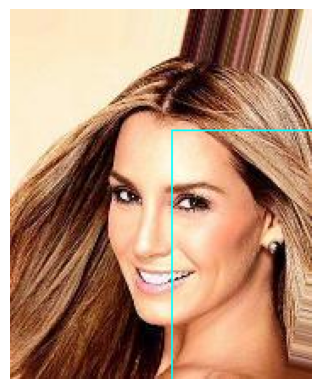

In [17]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Define the path to the bounding box CSV file
bboxes_df = pd.read_csv('C:\\Users\\TotalTech\\Downloads\\archive\\list_bbox_celeba.csv')
bboxes = bboxes_df[['image_id', 'x_1', 'y_1', 'width', 'height']]

# Define the path to the image you want to load
image_id = '000001.jpg'  # Update this with the actual image ID you want to load
paths_to_images = f'C:\\Users\\TotalTech\\Downloads\\archive\\img_align_celeba\\img_align_celeba\\{image_id}'

# Load the original image
original_image = cv2.imread(paths_to_images)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error loading image: {paths_to_images}")
else:
    example_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get the bounding box for the current image
    current_bbox = bboxes.query('image_id == "{}"'.format(image_id))
    x, y, w, h = current_bbox.iloc[0, 1:].values

    # Draw the bounding box on the image
    example_image = cv2.rectangle(example_image, (x, y), (x + w, y + h), (0, 255, 255), 1)

    # Display the image with the bounding box
    plt.imshow(example_image)
    plt.axis('off')
    plt.show()


In [18]:
partition_df = pd.read_csv('C:\\Users\\TotalTech\\Downloads\\archive\\list_eval_partition.csv')

partition_df.head()

image_id  partition
0  000001.jpg          0
1  000002.jpg          0
2  000003.jpg          0
3  000004.jpg          0
4  000005.jpg          0

In [19]:
partition_df['partition'].value_counts()

partition
0    162770
2     19962
1     19867
Name: count, dtype: int64

In [20]:
train_images = partition.query('partition == 0')
valid_images = partition.query('partition == 1')
test_images = partition.query('partition == 2')


In [21]:
attributes_df = pd.read_csv("C:\\Users\\TotalTech\\Downloads\\archive\\list_attr_celeba.csv")

attributes_df.head()


image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the discriminator model
discriminator = keras.Sequential([
    keras.Input(shape=(64, 64, 3)),
    layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
], name="discriminator")

# Print the model summary
discriminator.summary()


C:\Users\TotalTech\miniconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Latent dimension
latent_dim = 100

# Define the generator model
generator = keras.Sequential([
    keras.Input(shape=(latent_dim,)),
    layers.Dense(8 * 8 * 128),
    layers.Reshape((8, 8, 128)),
    layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid")
], name="generator")

# Print the model summary
generator.summary()


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8192)                │         827,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 512)         │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 3)           │          38,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,750,275 (14.31 MB)

 Trainable params: 3,750,275 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import os

image_dir = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"
print(os.listdir(image_dir))  # This will list the files in the directory


['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '000071.jpg', '0000

In [25]:
import os

image_dir = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"
image_files = os.listdir(image_dir)
print([f for f in image_files if f.endswith('.jpeg')])  # List all .jpeg files


[]


In [26]:
from tensorflow import keras

image_dir = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"
dataset = keras.preprocessing.image_dataset_from_directory(
    image_dir,
    label_mode=None,
    image_size=(64, 64),
    batch_size=32,
    color_mode="rgb"  # Ensure images are loaded as RGB
)

# Normalize the dataset
dataset = dataset.map(lambda x: x / 255.0)

for image_batch in dataset.take(1):  # Test loading a batch
    print(image_batch.shape)  # Should print the shape of the images (batch_size, 64, 64, 3)


Found 202599 files.
(32, 64, 64, 3)


In [27]:
import os

image_dir = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"
image_files = os.listdir(image_dir)

# Check if '000001' exists and what its extension is
for img_file in image_files:
    if img_file.startswith('000001'):
        print(img_file)  # This will show the correct file name


000001.jpg


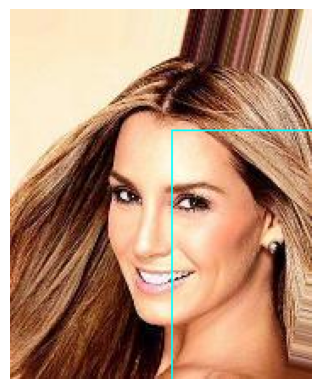

In [28]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image  # Correct import

# Define the path to the bounding box CSV file
bboxes_df = pd.read_csv('C:\\Users\\TotalTech\\Downloads\\archive\\list_bbox_celeba.csv')
bboxes = bboxes_df[['image_id', 'x_1', 'y_1', 'width', 'height']]

# Define the path to the image you want to load
image_id = '000001.jpg'  # Update this with the actual image ID you want to load
img_path = f'C:\\Users\\TotalTech\\Downloads\\archive\\img_align_celeba\\img_align_celeba\\{image_id}'

# Load the original image using cv2
original_image = cv2.imread(img_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error loading image: {img_path}")
else:
    example_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get the bounding box for the current image
    current_bbox = bboxes.query('image_id == "{}"'.format(image_id))
    x, y, w, h = current_bbox.iloc[0, 1:].values

    # Draw the bounding box on the image
    example_image = cv2.rectangle(example_image, (x, y), (x + w, y + h), (0, 255, 255), 1)

    # Display the image with the bounding box
    plt.imshow(example_image)
    plt.axis('off')
    plt.show()



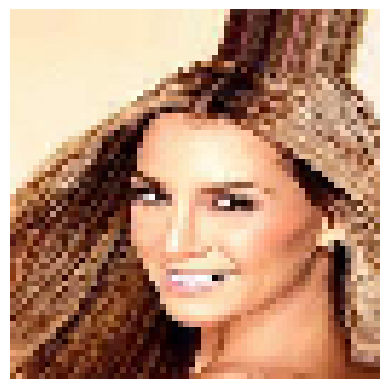

In [29]:
img_base = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba\000001"
for ext in ['.jpeg', '.jpg']:
    img_path = img_base + ext
    if os.path.exists(img_path):
        img = image.load_img(img_path, target_size=(64, 64))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        break
else:
    print("File not found with either .jpeg or .jpg extension")


In [30]:
dataset = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba",
    label_mode=None,
    image_size=(64, 64),
    batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)


Found 202599 files.


In [31]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)

        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)

        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


In [32]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))
        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        plt.show()


In [33]:
import os

# Define the directory containing the images
directory = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"

# Loop through the range of old filenames
for old_number in range(6322, 6322 - 3000, -1):
    old_filename = f"{old_number:06d}.jpeg"  # Assuming the format is 000001.jpeg
    new_number = old_number - 3000
    new_filename = f"{new_number:06d}.jpeg"

    # Create full paths
    old_path = os.path.join(directory, old_filename)
    new_path = os.path.join(directory, new_filename)

    # Rename the file if it exists
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_filename} to {new_filename}")
    else:
        print(f"File not found: {old_filename}")


File not found: 006322.jpeg
File not found: 006321.jpeg
File not found: 006320.jpeg
File not found: 006319.jpeg
File not found: 006318.jpeg
File not found: 006317.jpeg
File not found: 006316.jpeg
File not found: 006315.jpeg
File not found: 006314.jpeg
File not found: 006313.jpeg
File not found: 006312.jpeg
File not found: 006311.jpeg
File not found: 006310.jpeg
File not found: 006309.jpeg
File not found: 006308.jpeg
File not found: 006307.jpeg
File not found: 006306.jpeg
File not found: 006305.jpeg
File not found: 006304.jpeg
File not found: 006303.jpeg
File not found: 006302.jpeg
File not found: 006301.jpeg
File not found: 006300.jpeg
File not found: 006299.jpeg
File not found: 006298.jpeg
File not found: 006297.jpeg
File not found: 006296.jpeg
File not found: 006295.jpeg
File not found: 006294.jpeg
File not found: 006293.jpeg
File not found: 006292.jpeg
File not found: 006291.jpeg
File not found: 006290.jpeg
File not found: 006289.jpeg
File not found: 006288.jpeg
File not found: 0062

In [34]:
import os
import random
import shutil

# Set the path to your original dataset and the new dataset
original_dataset_path = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba"
new_dataset_path = r"C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba_subset"

# Create a new directory if it doesn't exist
if not os.path.exists(new_dataset_path):
    os.makedirs(new_dataset_path)

# List all JPEG files in the original dataset
all_images = [f for f in os.listdir(original_dataset_path) if f.endswith('.jpg')]

# Check the total number of images
print(f"Total images found: {len(all_images)}")

# Randomly select 2662 images
selected_images = random.sample(all_images, 2662)

# Copy selected images to the new directory
for image_name in selected_images:
    shutil.copy(os.path.join(original_dataset_path, image_name), new_dataset_path)

print(f"Copied {len(selected_images)} images to {new_dataset_path}.")


Total images found: 202599
Copied 2662 images to C:\Users\TotalTech\Downloads\archive\img_align_celeba\img_align_celeba_subset.


In [ ]:
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))


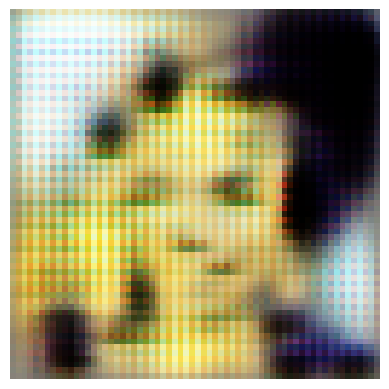

In [4]:
def display_specific_image(image_name):
    img = PIL.Image.open(image_name)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()


display_specific_image("generated_img_013_4.png")


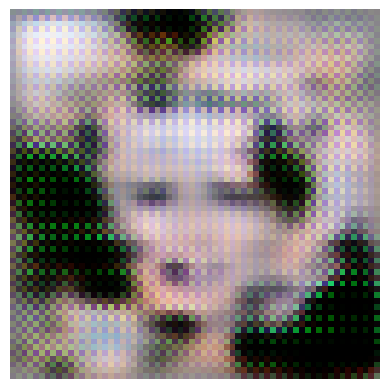

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_specific_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Call the function with the correct path
display_specific_image(r"C:\Users\TotalTech\generated_img_010_1.png")
